In [4]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')


In [ ]:
# get experiment temperature information
fridge = np.genfromtxt(fname='fridgeData.txt', delimiter = ',', names=["Index", "APDS Light Sensor", "ADC Bare Thermistor", "R Bare Thermistor", "Bare Thermistor", "HS Thermometer", "LPS Thermometer", "uP Thermometer"])

In [ ]:
# just take a looksiedaisy there
print(fridge[0:20])

[( 0.,  39., 401., 2.38,  94.81, 31.09, 22.28, 76.25)
 ( 1.,  15., 296., 1.71, 106.17, 32.9 , 32.23, 76.25)
 ( 2.,   9., 571., 3.55,  81.9 , 34.18, 34.24, 77.5 )
 ( 3.,  49., 578., 3.6 ,  81.46, 35.35, 35.52, 81.  )
 ( 4.,  47., 639., 4.05,  77.83, 36.48, 36.8 , 83.  )
 ( 5.,  51., 586., 3.66,  80.96, 37.54, 38.02, 84.75)
 ( 6.,   9., 587., 3.66,  80.9 , 38.51, 39.18, 86.75)
 ( 7.,  45., 588., 3.67,  80.84, 39.42, 40.22, 87.75)
 ( 8.,  23., 594., 3.72,  80.47, 40.26, 41.21, 89.25)
 ( 9.,  52., 597., 3.74,  80.29, 41.02, 42.09, 90.25)
 (10.,  51., 600., 3.76,  80.11, 41.75, 42.92, 91.  )
 (11.,  51., 605., 3.8 ,  79.81, 42.43, 43.7 , 92.25)
 (12.,  39., 599., 3.75,  80.17, 43.06, 44.41, 92.75)
 (13.,  52., 617., 3.89,  79.09, 43.64, 45.07, 93.  )
 (14.,  53., 606., 3.8 ,  79.75, 44.19, 45.7 , 93.75)
 (15.,  53., 608., 3.82,  79.63, 44.69, 46.29, 94.25)
 (16.,  39., 689., 4.43,  75.1 , 45.18, 46.82, 95.  )
 (17., 105., 610., 3.83,  79.51, 45.59, 47.34, 95.25)
 (18., 267., 606., 3.8 ,  79

In [ ]:
# take and label things
index = fridge["Index"]
light = fridge["APDS_Light_Sensor"]
baretemp = fridge["Bare_Thermistor"]
HStemp = fridge["HS_Thermometer"]
LPStemp = fridge["LPS_Thermometer"]
uPtemp = fridge["uP_Thermometer"]


In [41]:
# CHANGE HERE HOW LONG EXPERIMENT LASTED
exp_minutes = 191
exp_secs = exp_minutes*60
# multiplying factor for converting index to time
dt = exp_secs / index.size
print(dt)

9.002356637863315


In [ ]:
# for approximating: 
# iterate thru each thermometer, look for the first time (Tenv-Ti) < 0.368 * (Tenv-T0)
# report that index and break from the loop
# then we plot them all over top
lowlightind, lowlight = index[light < 5], light < 5
print(lowlightind[0])
print(lowlightind[-1])
cold_st = int(lowlightind[0])
cold_end = int(lowlightind[-1])
coldind = np.arange(cold_st, cold_end+1)
warmind = np.arange(cold_end, index.size)
# warm end is implied by end of experiment

20.0
700.0


In [17]:
# Coldifying temp curve
coldbaretemp = baretemp[cold_st:cold_end+1]
coldHStemp = HStemp[cold_st:cold_end+1]
coldLPStemp = LPStemp[cold_st:cold_end+1]
colduPtemp = uPtemp[cold_st:cold_end+1]

# Warmifying temp curve
warmbaretemp = baretemp[cold_end:]
warmHStemp = HStemp[cold_end:]
warmLPStemp = LPStemp[cold_end:]
warmuPtemp = uPtemp[cold_end:]

In [ ]:
# Set up the chosen bare temperatures
stwarmbaretemp = coldbaretemp[0]
eqcoldbaretemp = coldbaretemp[-1]
endwarmbaretemp = warmbaretemp[-1]
stwarmHStemp = coldHStemp[0]
eqcoldHStemp = coldHStemp[-1]
endwarmHStemp = warmHStemp[-1]
stwarmLPStemp = coldLPStemp[0]
eqcoldLPStemp = coldLPStemp[-1]
endwarmLPStemp = warmLPStemp[-1]
stwarmuPtemp = colduPtemp[0]
eqcolduPtemp = colduPtemp[-1]
endwarmuPtemp = warmuPtemp[-1]


In [ ]:
# find the change in index by time constant
dindtaucoldbaretemp = coldind[(coldbaretemp < (0.37 * (stwarmbaretemp - eqcoldbaretemp) + eqcoldbaretemp))][0] - cold_st
dindtaucoldHStemp = coldind[(coldHStemp < (0.37 * (stwarmHStemp - eqcoldHStemp) + eqcoldHStemp))][0] - cold_st
dindtaucoldLPStemp = coldind[(coldLPStemp < (0.37 * (stwarmLPStemp - eqcoldLPStemp) + eqcoldLPStemp))][0] - cold_st
dindtaucolduPtemp = coldind[(colduPtemp < (0.37 * (stwarmuPtemp - eqcolduPtemp) + eqcolduPtemp))][0] - cold_st

print("Approximate time constants:")
print(f"Bare Thermistor: {dindtaucoldbaretemp * dt}s")
print(f"HS Thermometer: {dindtaucoldHStemp * dt}s")
print(f"LPS Thermometer: {dindtaucoldLPStemp * dt}s")
print(f"uP Thermometer: {dindtaucolduPtemp * dt}s")

# bare thermistor heated up :(

Approximate time constants:
Bare Thermistor: 0s
HS Thermometer: 1290s
LPS Thermometer: 1260s
uP Thermometer: 1450s


Text(0.5, 1.0, 'Instrument Temperature for Cold Experiment over time')

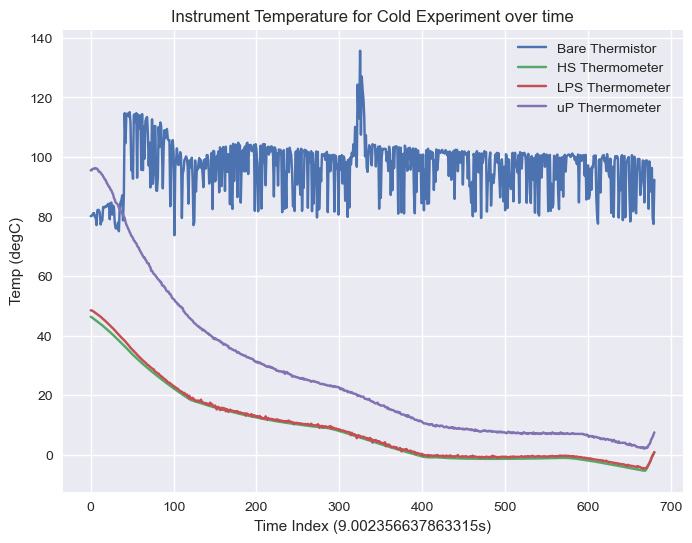

In [42]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(coldbaretemp, label='Bare Thermistor')
ax.plot(coldHStemp, label='HS Thermometer')
ax.plot(coldLPStemp, label='LPS Thermometer')
ax.plot(colduPtemp, label='uP Thermometer')
ax.legend(loc='best')
ax.set_xlabel(f"Time Index ({dt}s)")
ax.set_ylabel("Temp (degC)")
ax.set_title("Instrument Temperature for Cold Experiment over time")

In [43]:
# bare thermistor correction element in case lucille fucked up and didnt input the right data
# PLUS in case it does something weird for some reason
coldbarest = coldbaretemp[:100].argmax() + cold_st
dindtaucoldbaretempnew = coldind[coldbarest:][(coldbaretemp[coldbarest:] < (0.37 * (stwarmbaretemp - eqcoldbaretemp) + eqcoldbaretemp))][0] - coldbarest
print("Approximate time constant:")
print(f"Bare Thermistor: {dindtaucoldbaretempnew * dt}s")

Approximate time constant:
Bare Thermistor: 441.11547525530244s


In [ ]:
# T(t)=(T_s-T_e)e^{-t/\tau}+T_e
# (T(t) - T_e)/(T_s-T_e) = e^-t*tau
# ln((T(t)-T_e)/(T_s-T_e)) = -t*tau
# t(ln(T(t)-T_e)-ln(T_s-T_e))=tau
# find time constant here by plotting stuff against t
y = baretemp[coldbarest:cold_end+1] - eqcoldbaretemp
t = (coldind[coldbarest - cold_st:] * dt)
print(t.size)
print(y.size)
coefs = np.polyfit(t, y, deg=1)
print(-1/coefs[0])

634
634
894.8921311003585
